### Logistic Regression and Stochastic Gradient Descent on Diabetes Dataset
This notebook implements Logistic Regression with Stochastic Gradient Descent classifier using sklearn. It uses the diabetes dataset.

There are two ML models created here:
- basic sklearn Logistic Regression model using SGD classifier (input data is not transformed)
- basic sklearn Logistic Regression model using SGD classifier (input data is transformed with scaler)

The comparison test for scaling is for illustrative purposes as sklearn advises to transform the data when using an sgd classifier as they are sensitive to feature scaling. Refer to section:
- https://scikit-learn.org/stable/modules/sgd.html#tips-on-practical-use

And while I scale most of the input features in the dataset in Section 2, technically not all need to be scaled, for example, if the feature has a natural scale.

#### Section 1: EDA, ML Model training without using data transformation
This section creates the model without transforming the input feature dataset. Import required libraries - logistic regression model, stochastic gradient descent classifier. We will do an updated import in section 2 to compare the model with the untransformed data in section 1. We are also including additional libraries from this notebook ML template onwards - classification report, confusion matrix, seaborn and matplotlib for data visualization plots of the performance evaluation metrics.

In [54]:
import pandas as pd
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
from matplotlib import pyplot

##### Exploratory Data Analysis
We use the diabetes dataset. For information about this dataset, refer to the Kaggle dataset library summary:
- https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database

This will predicte whether a patient does or does not have diabetes. We have multiple predictor variables and one target variable - Outcome.

In [2]:
diabetes_df = pd.read_csv("datasets/diabetes.csv")

In [3]:
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
diabetes_df.shape

(768, 9)

In [47]:
diabetes_df.size

6912

In [7]:
diabetes_df.ndim

2

In [8]:
diabetes_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
diabetes_df.sample(n=5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
362,5,103,108,37,0,39.2,0.305,65,0
435,0,141,0,0,0,42.4,0.205,29,1
426,0,94,0,0,0,0.0,0.256,25,0
40,3,180,64,25,70,34.0,0.271,26,0
733,2,106,56,27,165,29.0,0.426,22,0


Verify if any null values in the dataframe for a given data column.

In [10]:
diabetes_df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [11]:
diabetes_df.nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

In [12]:
diabetes_df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [13]:
diabetes_df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

The following calculates the pairwise correlation of columns. It does not include NA/null values.
- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html

In [14]:
diabetes_df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


Produce data visualization histogram plots for the pandas dataframe for the diabetes dataset and focus on the input feature distributions as we are going to scale them using an sklearn transformation library in section 2. The following plots are quite typical of featurestore platforms I have used on trial basis.

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

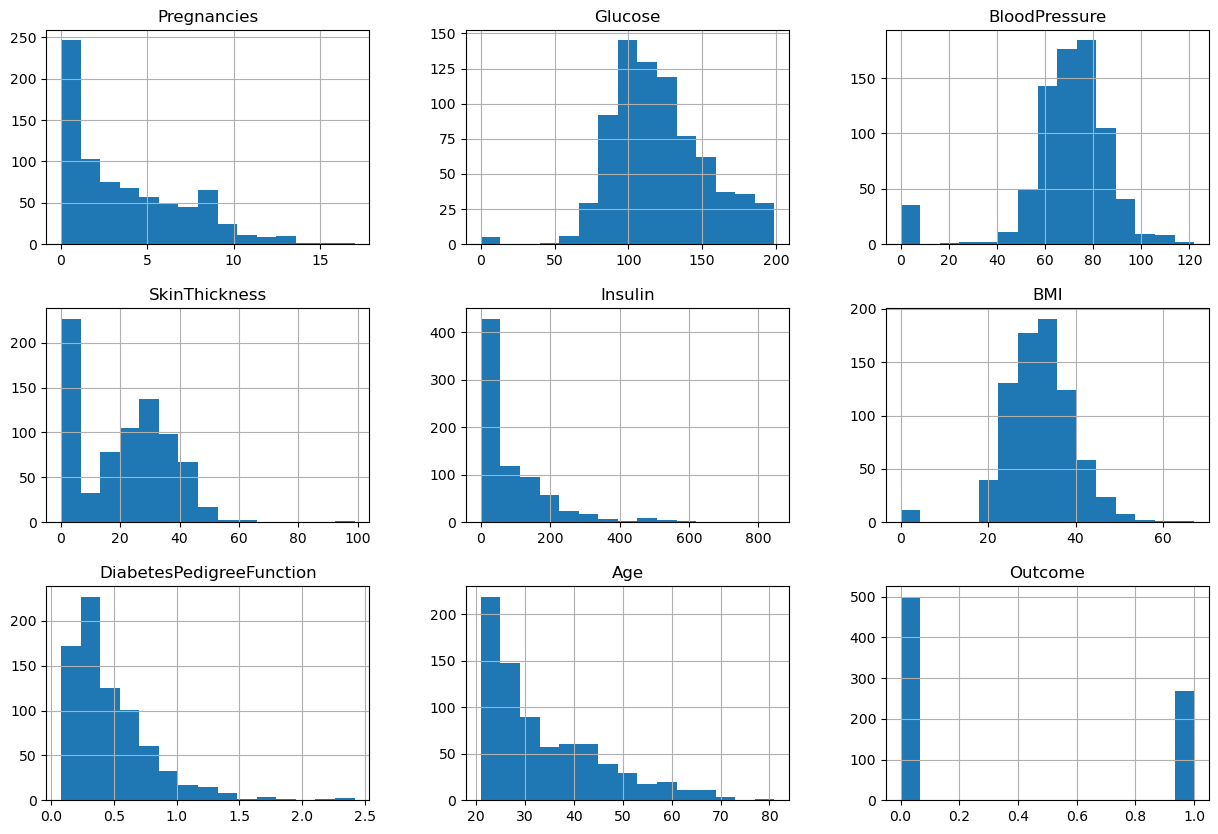

In [16]:
# Get histogram for each numeric variable - 9 variables so layout = 3x3. Focus on the input feature distribution
features_including_output_label = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
diabetes_df[features_including_output_label].hist(bins=15, figsize=(15, 10), layout=(3, 3));

Define our feature dataset and our response variable for later model training.

In [17]:
X_diabetes = diabetes_df.iloc[: , :8]

In [18]:
X_diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [19]:
from sklearn.model_selection import train_test_split

##### Create a train:test split on the dataset
Next, we define our train:test split using sklearn library. This lets us defined our supervised learning training set and a holdout test data subset. We will use a 33% portion of the dataset as a test set. We will use this to test the accuracy of the ML model on data it has not seen before in training and if it has overfit during training or can generalize to unseen data.

In [20]:
# split into features and categorical predictor variable (0 or 1)
X_diabetes = diabetes_df.iloc[: , :8]
y_diabetes = diabetes_df.iloc[: , -1]

# split into train and test sets with sklearn native train_test_split 33% test
X_diabetes_train, X_diabetes_test, y_diabetes_train, y_diabetes_test = train_test_split(X_diabetes, y_diabetes, test_size=0.33)

In [21]:
X_diabetes_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
384,1,125,70,24,110,24.3,0.221,25
751,1,121,78,39,74,39.0,0.261,28
387,8,105,100,36,0,43.3,0.239,45
175,8,179,72,42,130,32.7,0.719,36
466,0,74,52,10,36,27.8,0.269,22
...,...,...,...,...,...,...,...,...
544,1,88,78,29,76,32.0,0.365,29
199,4,148,60,27,318,30.9,0.150,29
70,2,100,66,20,90,32.9,0.867,28
410,6,102,90,39,0,35.7,0.674,28


In [22]:
X_diabetes_test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
665,1,112,80,45,132,34.8,0.217,24
430,2,99,0,0,0,22.2,0.108,23
398,3,82,70,0,0,21.1,0.389,25
465,0,124,56,13,105,21.8,0.452,21
755,1,128,88,39,110,36.5,1.057,37
...,...,...,...,...,...,...,...,...
341,1,95,74,21,73,25.9,0.673,36
462,8,74,70,40,49,35.3,0.705,39
33,6,92,92,0,0,19.9,0.188,28
372,0,84,64,22,66,35.8,0.545,21


In [23]:
X_diabetes_train.shape

(514, 8)

In [24]:
X_diabetes_test.shape

(254, 8)

##### Machine Learning Model and Training
Use log_loss to implement logistic regression with the SGDClassifier otherwise it defaults to hinge loss i.e. SVM, which we do not want as we want a probabilistic classifier.

In [25]:
# create our logistic regresion model instance from sklearn using an SGD classifier and update loss attribute value
# default = "hinge_loss" which is equivalent to linear support vector machine - we don't want that here
logistic_reg_sgd = SGDClassifier(loss="log_loss", max_iter=2000)

In [26]:
logistic_reg_sgd.fit(X_diabetes_train, y_diabetes_train)

SGDClassifier(loss='log_loss', max_iter=2000)

##### Logistic Regression Model using non-transformed Data: Run Predictions, Evaluate Performance
Evaluate the performance of the Logistic Regression with SGD classifier on our test holdout set from earlier train:test split of our dataset.

In [27]:
logistic_reg_sgd.score(X_diabetes_test, y_diabetes_test)

0.5708661417322834

In [28]:
y_pred = logistic_reg_sgd.predict(X_diabetes_test)
metrics = classification_report(y_diabetes_test, y_pred, output_dict=False)
print(metrics)

              precision    recall  f1-score   support

           0       0.73      0.52      0.60       161
           1       0.44      0.67      0.53        93

    accuracy                           0.57       254
   macro avg       0.59      0.59      0.57       254
weighted avg       0.62      0.57      0.58       254



Create a confusion matrix: this captures true positives, true negatives, false positives, false negatives.

In [48]:
cm = confusion_matrix(y_diabetes_test, y_pred)
cm

array([[83, 78],
       [31, 62]])

Below is a useful sklearn confusion matrix display utility plot. I always refer to it ever I need to check the array dimensions for true label, predicted labels. Seaborn is used later for an alternative display plot with text labels.

We have only two binary outputs in our response variable - No Diabetes (0), Diabetes (1). 
- Row 1, column 1 shows how many records the ML model predicted as not having diabetes (True Negative)
- Row 1, column 2 shows how many records the ML model predicted as having diabetes when they did not have it (False Positive)
- Row 2, column 1 shows how many records the ML model predicted as not having diabetes when they did have it (False Negative) 
- Row 2, column 2 shows many records the ML model predicted as having diabetes and they did have diabetes (True Positive)

Note: Read the diagonals - True Negative-True Positive, False Negative-False Positive.

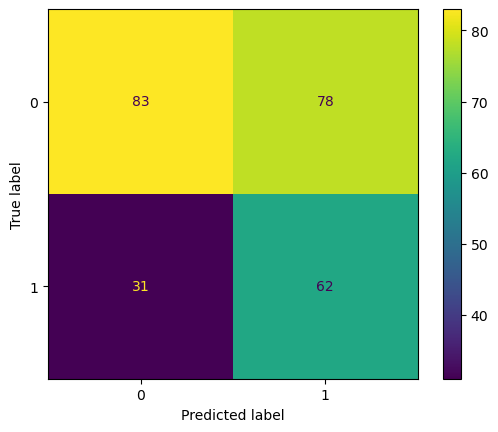

In [55]:
ConfusionMatrixDisplay(cm).plot()

<AxesSubplot:>

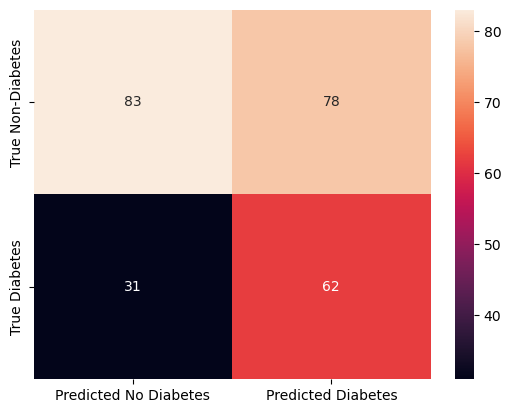

In [56]:
df_confusion_matrix = pd.DataFrame(cm, ['True Non-Diabetes', 'True Diabetes'],
                     ['Predicted No Diabetes', 'Predicted Diabetes'])

sns.heatmap(df_confusion_matrix, annot=True, fmt='g')

#### Section 2: Using sklearn scalers to transform input data
In Section 2, we use the sklearn preprocessing scaler functions to scale the input data in the feature dataset and re-train a new ML model and evaluate its performance using scaled input. 

Note we scale the train and test data sets so we can do a full comparison against the non-transformed input for the the ML model in Section 1.

The sklearn scalers are documented here:
- https://scikit-learn.org/stable/modules/preprocessing.html
- https://developers.google.com/machine-learning/data-prep/transform/introduction

The Google article is important on the step that you do the transformation (pre-model training, in-model training) and outlines pros and cons of both approaches.

The sklearn StandardScaler and MinMaxScaler are just two of a few options to choose from within sklearn. We pass our input feature columns for test and train to the scaler.

In [31]:
from sklearn import preprocessing
# scaler = preprocessing.StandardScaler().fit(X_diabetes_train)
scaler = preprocessing.MinMaxScaler().fit(X_diabetes_train)

In [32]:
scaler

MinMaxScaler()

In [33]:
# scaler.mean_ (only available with StandardScaler)

In [34]:
scaler.scale_

array([0.06666667, 0.00502513, 0.00819672, 0.01587302, 0.00118203,
       0.01490313, 0.42698548, 0.01960784])

##### Machine Learning Model and Training

In [35]:
X_scaled_train = scaler.transform(X_diabetes_train)

In [36]:
X_scaled_train

array([[0.06666667, 0.6281407 , 0.57377049, ..., 0.36214605, 0.06105892,
        0.07843137],
       [0.06666667, 0.6080402 , 0.63934426, ..., 0.58122206, 0.07813834,
        0.1372549 ],
       [0.53333333, 0.52763819, 0.81967213, ..., 0.64530551, 0.06874466,
        0.47058824],
       ...,
       [0.13333333, 0.50251256, 0.54098361, ..., 0.49031297, 0.33689155,
        0.1372549 ],
       [0.4       , 0.51256281, 0.73770492, ..., 0.53204173, 0.25448335,
        0.1372549 ],
       [0.26666667, 0.51758794, 0.49180328, ..., 0.35767511, 0.37916311,
        0.23529412]])

Repeat the transformation for the test dataset i.e. don't just transform the training dataset and feed non-transformed test data into the trained ML model!

In [37]:
X_scaled_test = scaler.transform(X_diabetes_test)

In [38]:
X_scaled_test

array([[0.06666667, 0.56281407, 0.6557377 , ..., 0.51862891, 0.05935098,
        0.05882353],
       [0.13333333, 0.49748744, 0.        , ..., 0.33084948, 0.01280956,
        0.03921569],
       [0.2       , 0.4120603 , 0.57377049, ..., 0.31445604, 0.13279249,
        0.07843137],
       ...,
       [0.4       , 0.46231156, 0.75409836, ..., 0.29657228, 0.0469684 ,
        0.1372549 ],
       [0.        , 0.42211055, 0.52459016, ..., 0.53353204, 0.19940222,
        0.        ],
       [0.06666667, 0.        , 0.55737705, ..., 0.47690015, 0.13279249,
        0.01960784]])

We now train the logistic regression model on the transformed training dataset. We are using SGD, so max_iter is set for that reason.

In [39]:
logistic_reg_sgd_scaled_data = SGDClassifier(loss="log_loss", max_iter=2000)

In [40]:
logistic_reg_sgd_scaled_data.fit(X_scaled_train, y_diabetes_train)

SGDClassifier(loss='log_loss', max_iter=2000)

##### Logistic Regression Model using Transformed Data: Run Predictions, Evaluate Performance
We now run the predictive analytics against the scaled/transformed test dataset and calculate the learning accuracy score.

In [41]:
logistic_reg_sgd_scaled_data.score(X_scaled_test, y_diabetes_test)

0.7047244094488189

In general, the transformed model, especially using MinMaxScaler() tends to result in a score around 70-78% for the Section 2 logistic regression model compared to about 53% to 63% for non-transformed data and section 1 logistic regression model.

Include the sklearn classification report for precision, recall, f1-score, and support metrics.

In [42]:
y_pred_scaled = logistic_reg_sgd_scaled_data.predict(X_scaled_test)
metrics_scaled = classification_report(y_diabetes_test, y_pred_scaled, output_dict=False)

In [43]:
print(metrics_scaled)

              precision    recall  f1-score   support

           0       0.70      0.94      0.80       161
           1       0.75      0.29      0.42        93

    accuracy                           0.70       254
   macro avg       0.72      0.62      0.61       254
weighted avg       0.72      0.70      0.66       254



Include Confusion Matrix from sklearn.

In [50]:
cm_scaled = confusion_matrix(y_diabetes_test, y_pred_scaled)

In [51]:
cm_scaled

array([[152,   9],
       [ 66,  27]])

<AxesSubplot:>

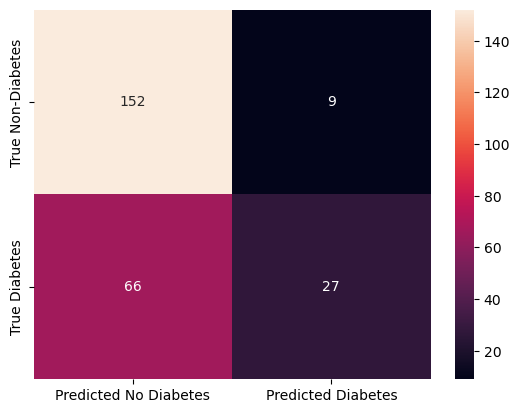

In [57]:
df_confusion_matrix_scaled = pd.DataFrame(cm_scaled, ['True Non-Diabetes', 'True Diabetes'],
                     ['Predicted No Diabetes', 'Predicted Diabetes'])

sns.heatmap(df_confusion_matrix_scaled, annot=True, fmt='g')

#### Web References
- https://scikit-learn.org/stable/modules/sgd.html
- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
- https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html
- https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html